In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms_v

# https://pytorch.org/text/stable/transforms.html
import torchtext
import torchtext.transforms as transforms_t

import os 
import json
from tqdm import tqdm
from PIL import Image
import pickle

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Colab Notebooks/코드 이론/text2image/'
from coco import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/코드 이론/text2image
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dataset load

coco = COCO_dataset()

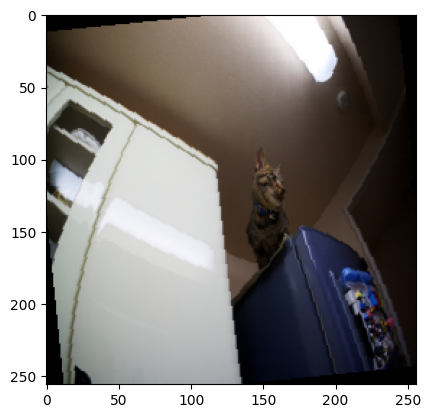

A gray cat standing on the top of a refrigerator.


In [ ]:
# example

image, text = coco[23900]
plt.imshow(np.transpose(image,(1,2,0)))
plt.show()
print(text)

In [ ]:
# # CLIP BPE
# MERGES_FILE = "http://download.pytorch.org/models/text/clip_merges.bpe"
# ENCODER_FILE = "http://download.pytorch.org/models/text/clip_encoder.json"
# tokenizer = transforms_t.CLIPTokenizer(merges_path=MERGES_FILE, encoder_json_path=ENCODER_FILE)
# tokenizer(text)

# vocab = tokenizer.bpe.bpe_merge_ranks_
# vocab_r = {v:k for (k,v) in sorted(vocab.items(),key=lambda x : x[1])}
# vocab_size = len(vocab)
# vocab_size

# print(len(corpus))# 25014
# print(max_texts) # 7

'A television set is on next to a bottle of water.'

In [ ]:
# https://pytorch.org/text/stable/models.html

import torch, torchtext
from torchtext.functional import to_tensor

xlmr_base = torchtext.models.XLMR_BASE_ENCODER
model = xlmr_base.get_model()
roberta_transform = xlmr_base.transform()

torch.Size([1, 15, 768])

In [ ]:
input = [coco[i][1] for i in range(3)]
input

['A black Honda motorcycle parked in front of a garage.',
 'A Honda motorcycle parked in a grass driveway',
 'An office cubicle with four different types of computers.']

In [ ]:
model_input = to_tensor(roberta_transform(input), padding_value=0)
output = model(model_input)
output.shape

torch.Size([3, 15, 768])

In [ ]:
model_input

tensor([[     0,     62,  22556,  33220,   2926,  75457,   9201,    297,     23,
          12912,    111,     10,  53133,      5,      2],
        [     0,     62,  33220,   2926,  75457,   9201,    297,     23,     10,
          27689,      7,  22648,   7514,      2,      0],
        [     0,    893,  23179, 123069,  11030,    678,  22759,  12921,  52895,
            111,  13909,      7,      5,      2,      0]])

In [ ]:
output

tensor([[[ 0.1040,  0.1141,  0.0744,  ..., -0.1230,  0.0201,  0.0126],
         [-0.1066, -0.0237, -0.0054,  ..., -0.0453, -0.0065,  0.0136],
         [-0.1315,  0.0404, -0.0251,  ..., -0.0576, -0.0246,  0.0280],
         ...,
         [-0.0197,  0.0784,  0.0419,  ...,  0.1694, -0.0336,  0.0636],
         [-0.0343, -0.0632, -0.0100,  ..., -0.1182, -0.0309,  0.0943],
         [ 0.0366,  0.0748, -0.0458,  ..., -0.1858, -0.0402,  0.0878]]],
       grad_fn=<TransposeBackward0>)